In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

# Provide the file path to the H5AD file
file_path = "Impaired_local_intrinsic_immunity_to_SARS_CoV_2_infection_in_severe_COVID_19.h5ad"

# Read the H5AD file using sc.read()
adata = sc.read(file_path)

# Data preprocessing
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.8)
adata = adata[:, adata.var['highly_variable']]  # Subsetting to highly variable genes

# Dimensionality reduction (PCA)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True)

# Neighbors and UMAP
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=36)
sc.tl.umap(adata)

# Clustering (Louvain)
sc.tl.louvain(adata, resolution=0.6)

# Differential gene expression
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon', use_raw=True)

# Define cell types based on markers
marker_to_cell_type = {
    'TP63|KRT5|KRT15': 'Basal',
    'MUC5AC|MUC5B': 'Goblet',
    # Add other marker-to-cell-type mappings here
}

# Extract top marker genes per cluster from the ranking results
top_marker_genes = adata.uns['rank_genes_groups']['names']

# Assign cell types based on marker expression
cell_types = []
for gene_list in top_marker_genes:
    matched_cell_type = None
    for markers, cell_type in marker_to_cell_type.items():
        if all(marker in gene_list for marker in markers.split('|')):
            matched_cell_type = cell_type
            break
    if matched_cell_type:
        cell_types.append(matched_cell_type)
    else:
        cell_types.append('Unknown')

# Add cell type information to 'adata'
adata.obs['cell_type'] = cell_types

# Visualization
sc.pl.umap(adata, color=['louvain', 'cell_type'])


/home/asus/miniconda3/envs/ipy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/asus/miniconda3/envs/ipy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/asus/miniconda3/envs/ipy/lib/python3.11/site-packages/umap/distances.py:

ValueError: Length of values (32561) does not match length of index (32588)

In [ ]:
sc.pl.umap(adata, color=['louvain', 'cell_type'])

/home/asus/miniconda3/envs/ipy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


StopIteration: 

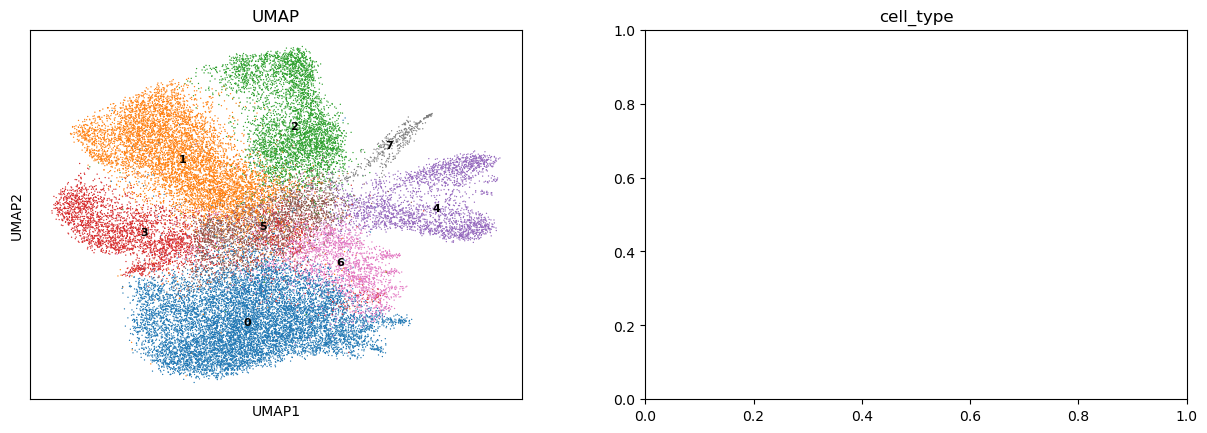

In [6]:
# Visualization
sc.pl.umap(adata, color=['louvain', 'cell_type'], title='UMAP', legend_loc='on data', legend_fontsize=8, save='umap_plot.png')
